# Projet Transversal 5
### Surveillance de la Biodiversité

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [63]:
# Charger les données depuis le fichier Excel
data = pd.read_excel("Biodiversite.xlsx")

data

,Espèce,Nombre d'individus,Densité relative,Fréquence relative,Température (°C),Pluviométrie (mm),Type de sol,Altitude (m),Type d'habitat,Menaces
0,Sclerocarya birrea,7,0.4,14,28,120,Argilo-sableux,200,Savane,"Surexploitation, déforestation"
1,Balanites aegyptiaca,4,0.2,3,30,90,Sablo-limoneux,150,Steppe,"Surexploitation, pression agricole"
2,Sterospermum kunthianum,2,0.1,3,29,110,Limono-sableux,180,Forêt sèche,"Déforestation, changement climatique"
3,Adansonia digitata,2,0.1,7,26,85,Limono-argileux,120,Savane,"Déforestation, surexploitation"
4,Cordia rothi,5,0.3,7,27,95,Argilo-sableux,250,Forêt dense,"Déforestation, surexploitation"
5,Commiphora africana,6,0.3,7,26,100,Sablo-limoneux,180,Forêt sèche,"Déforestation, surexploitation"
6,Tamarindus indica,17,0.9,38,28,125,Limono-argileux,220,Forêt dense,"Déforestation, surexploitation"
7,Codaba farinosa,0,0.0,0,25,80,Limono-sableux,90,Steppe,"Incendies, surexploitation"
8,Capparis tomentosa,13,0.7,21,26,110,Argilo-sableux,180,Steppe,"Surexploitation, déforestation"
9,Maytenus senegalensis,0,0.0,0,25,90,Limono-argileux,100,Forêt sèche,"Déforestation, surexploitation"


Dans ce qui suit, on cherche à avoir un même type de variable pour les données qui serviront à l'apprentissage et au test. 

Nous avons deux possibilités: 
###### - l'attribution arbitraire de valeurs aux variables catégorielles
###### - l'utilisation de l'encodage "one-hot"

##### - L'attribution arbitraire de valeurs aux variables catégorielles

###### Nous mettons ceci en commentaire car cette méthode n'est pas celle que nous utiliserons, et nous expliquerons pourquoi dans l'utilisation de la seconde méthode.

De ce fait, on récupère d'abord les types de sol uniques dans une liste Typesol en utilisant la méthode unique() sur la colonne "Type de sol" et en convertissant le résultat en liste avec tolist().

Ensuite, on crée un dictionnaire indice_typesol qui mappera chaque type de sol à un indice unique en initialisant l'indice à 1 et en incrémentant sa valeur à chaque itération de la boucle for.

Enfin, on ajoute une colonne "IndiceTypesol" au dataframe data en utilisant la méthode map() sur la colonne "Type de sol" et en passant le dictionnaire indice_typesol en argument. Cette méthode appliquera la fonction de conversion spécifiée à chaque valeur de la colonne et retournera le résultat sous forme de série, qui sera ensuite assigné à la nouvelle colonne "IndiceTypesol".

In [64]:
# # Récupérer les types de sol uniques dans une liste
# Typesol = data["Type de sol"].unique().tolist()

# # Créer un dictionnaire pour mapper chaque type de sol à un indice unique
# indice_typesol = {}
# indice = 1
# for typesol in Typesol:
#     indice_typesol[typesol] = indice
#     indice += 1

# # Ajouter une colonne "IndiceTypesol" au dataframe en utilisant le dictionnaire
# data["IndiceTypesol"] = data["Type de sol"].map(indice_typesol)

# data

,Espèce,Nombre d'individus,Densité relative,Fréquence relative,Température (°C),Pluviométrie (mm),Type de sol,Altitude (m),Type d'habitat,Menaces,IndiceTypesol
0,Sclerocarya birrea,7,0.4,14,28,120,Argilo-sableux,200,Savane,"Surexploitation, déforestation",1
1,Balanites aegyptiaca,4,0.2,3,30,90,Sablo-limoneux,150,Steppe,"Surexploitation, pression agricole",2
2,Sterospermum kunthianum,2,0.1,3,29,110,Limono-sableux,180,Forêt sèche,"Déforestation, changement climatique",3
3,Adansonia digitata,2,0.1,7,26,85,Limono-argileux,120,Savane,"Déforestation, surexploitation",4
4,Cordia rothi,5,0.3,7,27,95,Argilo-sableux,250,Forêt dense,"Déforestation, surexploitation",1
5,Commiphora africana,6,0.3,7,26,100,Sablo-limoneux,180,Forêt sèche,"Déforestation, surexploitation",2
6,Tamarindus indica,17,0.9,38,28,125,Limono-argileux,220,Forêt dense,"Déforestation, surexploitation",4
7,Codaba farinosa,0,0.0,0,25,80,Limono-sableux,90,Steppe,"Incendies, surexploitation",3
8,Capparis tomentosa,13,0.7,21,26,110,Argilo-sableux,180,Steppe,"Surexploitation, déforestation",1
9,Maytenus senegalensis,0,0.0,0,25,90,Limono-argileux,100,Forêt sèche,"Déforestation, surexploitation",4


Nous faisons de même pour les valeurs de la colonne "Type d'habitat". Cependant, pour différencier les indices de types de sol à ceux de types d'habitat, nous avons arbitrairement décidé que ces derniers serot sous la forme "9x" (par exemple : 91, 92, 93, 94, 95, 96, 97, 98, 99, 910, 911, 912, 913, ...)

In [65]:
# # Récupérer les types d'habitat uniques dans une liste
# TypesHabitat = data["Type d'habitat"].unique().tolist()

# # Créer un dictionnaire pour mapper chaque type d'habitat à un indice unique de la forme "9x"
# indice_typeshabitat = {}
# indice = 1
# for typeshabitat in TypesHabitat:
#     indice_typeshabitat[typeshabitat] = "9" + str(indice).zfill(2)
#     indice += 1

# # Ajouter une colonne "IndiceTypesHabitat" au dataframe en utilisant le dictionnaire
# data["IndiceTypesHabitat"] = data["Type d'habitat"].map(indice_typeshabitat)

# data

,Espèce,Nombre d'individus,Densité relative,Fréquence relative,Température (°C),Pluviométrie (mm),Type de sol,Altitude (m),Type d'habitat,Menaces,IndiceTypesol,IndiceTypesHabitat
0,Sclerocarya birrea,7,0.4,14,28,120,Argilo-sableux,200,Savane,"Surexploitation, déforestation",1,901
1,Balanites aegyptiaca,4,0.2,3,30,90,Sablo-limoneux,150,Steppe,"Surexploitation, pression agricole",2,902
2,Sterospermum kunthianum,2,0.1,3,29,110,Limono-sableux,180,Forêt sèche,"Déforestation, changement climatique",3,903
3,Adansonia digitata,2,0.1,7,26,85,Limono-argileux,120,Savane,"Déforestation, surexploitation",4,901
4,Cordia rothi,5,0.3,7,27,95,Argilo-sableux,250,Forêt dense,"Déforestation, surexploitation",1,904
5,Commiphora africana,6,0.3,7,26,100,Sablo-limoneux,180,Forêt sèche,"Déforestation, surexploitation",2,903
6,Tamarindus indica,17,0.9,38,28,125,Limono-argileux,220,Forêt dense,"Déforestation, surexploitation",4,904
7,Codaba farinosa,0,0.0,0,25,80,Limono-sableux,90,Steppe,"Incendies, surexploitation",3,902
8,Capparis tomentosa,13,0.7,21,26,110,Argilo-sableux,180,Steppe,"Surexploitation, déforestation",1,902
9,Maytenus senegalensis,0,0.0,0,25,90,Limono-argileux,100,Forêt sèche,"Déforestation, surexploitation",4,903


Ceci fait nous utiliserons comme variables explicatives (cad les caractéristiques) le nombre d'individus, la densité relative, la fréquence, la température, la pluviomètrie, l'indice de type de sol, l'altitude et l'indice de type d'habitat.

La variable cible sera, quant à elle, la menace, vu que nous voulons déterminer si une espèce est en danger ou non.

In [66]:
# # Séparer les variables explicatives (X) et la variable cible (y)
# X = data.drop(columns=["Espèce","Type de sol","Type d'habitat", "Menaces"])  # Caractéristiques des espèces
# y = data["Menaces"]  # Variable cible (espèce en danger ou non)

Passons maintenant à la méthode que nous utiliserons qui est l'encodage One-hot

###### L'utilisation de l'encodage "one-hot"

L'encodage one-hot (ou one-hot encoding en anglais) est une technique utilisée pour représenter des variables catégorielles discrètes (ou nominales) sous forme numérique. Cette technique consiste à créer une nouvelle colonne (ou feature) pour chaque catégorie de la variable catégorielle, et à attribuer une valeur de 1 à la colonne correspondant à la catégorie de l'échantillon, et une valeur de 0 à toutes les autres colonnes.

Cette technique est utile lorsque les algorithmes d'apprentissage automatique ne peuvent pas traiter directement des variables catégorielles. En effet, ces algorithmes sont souvent conçus pour fonctionner avec des données numériques, et les variables catégorielles peuvent être représentées sous forme de nombres arbitraires (le cas de la méthode précédente), ce qui peut entraîner des biais ou des erreurs dans les prédictions.

Passons donc à son utilisation

In [67]:
data = data.drop(columns=["IndiceTypesol", "IndiceTypesHabitat"])

data

,Espèce,Nombre d'individus,Densité relative,Fréquence relative,Température (°C),Pluviométrie (mm),Type de sol,Altitude (m),Type d'habitat,Menaces
0,Sclerocarya birrea,7,0.4,14,28,120,Argilo-sableux,200,Savane,"Surexploitation, déforestation"
1,Balanites aegyptiaca,4,0.2,3,30,90,Sablo-limoneux,150,Steppe,"Surexploitation, pression agricole"
2,Sterospermum kunthianum,2,0.1,3,29,110,Limono-sableux,180,Forêt sèche,"Déforestation, changement climatique"
3,Adansonia digitata,2,0.1,7,26,85,Limono-argileux,120,Savane,"Déforestation, surexploitation"
4,Cordia rothi,5,0.3,7,27,95,Argilo-sableux,250,Forêt dense,"Déforestation, surexploitation"
5,Commiphora africana,6,0.3,7,26,100,Sablo-limoneux,180,Forêt sèche,"Déforestation, surexploitation"
6,Tamarindus indica,17,0.9,38,28,125,Limono-argileux,220,Forêt dense,"Déforestation, surexploitation"
7,Codaba farinosa,0,0.0,0,25,80,Limono-sableux,90,Steppe,"Incendies, surexploitation"
8,Capparis tomentosa,13,0.7,21,26,110,Argilo-sableux,180,Steppe,"Surexploitation, déforestation"
9,Maytenus senegalensis,0,0.0,0,25,90,Limono-argileux,100,Forêt sèche,"Déforestation, surexploitation"


In [68]:
# Effectuer l'encodage One-Hot des variables catégorielles
X_encoded = pd.get_dummies(X)

Nous procédons ensuite à la division des données en ensembles d'entraînement et de test en utilisant la fonction train_test_split de "sklearn.model_selection." et à la création et l'entraînement du modèle de classification Random Forest Classifier en utilisant la fonction fit de "sklearn.ensemble."

Ce modèle est un algorithme d'apprentissage automatique qui appartient à la famille des forêts aléatoires (Random Forest en anglais). Il s'agit d'une technique d'ensemble qui combine plusieurs arbres de décision pour améliorer la précision et la robustesse des prédictions.

Le principe de fonctionnement de Random Forest Classifier repose sur la création de plusieurs arbres de décision, chacun étant entraîné sur un sous-ensemble aléatoire de l'ensemble de données d'apprentissage. Chaque arbre de décision produit une prédiction, et la prédiction finale est obtenue en combinant les prédictions de tous les arbres de décision à l'aide d'une technique de moyenne ou de vote majoritaire.

Il s'en suit la prédiction en tant que telle.

In [69]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Créer et entraîner un modèle de classification (Random Forest Classifier)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
predictions = model.predict(X_test)

Nous évaluons ensuite la performance du modèle, et ce, à travers :
###### - l'accuracy (ou accurateur en français)
        C'est le pourcentage de prédictions correctes par rapport au nombre total de prédictions. Il est obtenu en divisant le nombre de prédictions correctes par le nombre total de prédictions
        
###### - la précision 
        C'est le pourcentage de vrais positifs parmi tous les positifs prédits. Autrement dit, c'est le nombre de vrais positifs divisé par le nombre total de positifs prédits.
        
###### - le recall (ou rappel en français)
        C'est le pourcentage de vrais positifs parmi tous les positifs réels.
        
###### - le F1 Score
        C'est la moyenne harmonique de la précision et du rappel. Il s'agit d'une mesure qui tente de combiner les avantages de la précision et du rappel en une seule mesure. Le F1 Score atteint son maximum lorsque la précision et le rappel sont tous deux égaux à 1.
        
Nous utilisons comme attribut "average" qui prend la valeur "weighted". Ce dernier est un type de moyenne utilisé pour combiner les scores de précision, de rappel et de F1 pour chaque classe. 
Cela signifie que chaque classe est pondérée en fonction du nombre d'échantillons qui lui appartiennent. Autrement dit, les scores de précision, de rappel et de F1 sont pondérés par le nombre d'échantillons de chaque classe, ce qui donne une idée plus précise de la performance globale du classifieur.

Nous affichons ensuite le rapport de classification avant d'ajouter les fréquences de classes réelles et prédites dans un dataframe.

Nous userons enfin d'un diagramme en barre et d'une matrice de confusion qui permettent de visualiser la performance du modèle.

In [70]:
# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Afficher les résultats
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Afficher le rapport de classification
print(classification_report(y_test, predictions))


Accuracy: 0.16666666666666666
Precision: 0.08333333333333333
Recall: 0.16666666666666666
F1 Score: 0.1111111111111111
                                                       precision    recall  f1-score   support

                       Déforestation, surexploitation       0.00      0.00      0.00         2
        Déforestation, surexploitation, fragmentation       0.00      0.00      0.00         1
                           Incendies, surexploitation       0.00      0.00      0.00         0
                       Surexploitation, déforestation       0.25      0.50      0.33         2
Surexploitation, déforestation, changement climatique       0.00      0.00      0.00         1

                                             accuracy                           0.17         6
                                            macro avg       0.05      0.10      0.07         6
                                         weighted avg       0.08      0.17      0.11         6



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefined

Tout d'abord, les métriques d'évaluation sont indiquées en haut. Il s'agit de l'exactitude, de la précision, du rappel et du F1 score. Ces métriques sont toutes en moyenne assez faibles, ce qui indique que le modèle a des difficultés à prédire correctement les menaces pour chaque espèce.

Ensuite, la matrice de confusion est affichée. Cela montre le nombre de prédictions correctes et incorrectes pour chaque classe. Les lignes de la matrice représentent les valeurs réelles, tandis que les colonnes représentent les valeurs prédites. Par exemple, il y a eu deux prédictions correctes pour la classe "Surexploitation, déforestation", mais il y a également eu deux prédictions incorrectes pour cette même classe.

Enfin, il y a quelques avertissements qui sont apparus. Ces avertissements indiquent que certaines classes n'ont pas de prédictions ou de valeurs réelles, ce qui entraîne des divisions par zéro dans les calculs de précision et de rappel pour ces classes.

In [71]:
# Classes réelles
classes_reelles, count_reelles = np.unique(y_test, return_counts=True)

# Classes prédites
classes_predites, count_predites = np.unique(predictions, return_counts=True)

# Créer un dictionnaire avec les fréquences
freq_reelles = {classe: count_reelles[i] for i, classe in enumerate(classes_reelles)}
freq_predites = {classe: count_predites[i] for i, classe in enumerate(classes_predites)}

# Fusionner les deux dictionnaires
all_keys = set(freq_reelles).union(freq_predites)
merged_dict = {k: [freq_reelles.get(k, 0), freq_predites.get(k, 0)] for k in all_keys}

# Créer un DataFrame pandas
df = pd.DataFrame(merged_dict, index=['Reelles', 'Predites']).T

df

,Reelles,Predites
"Déforestation, surexploitation",2,1
"Déforestation, surexploitation, fragmentation",1,0
"Incendies, surexploitation",0,1
"Surexploitation, déforestation, changement climatique",1,0
"Surexploitation, déforestation",2,4


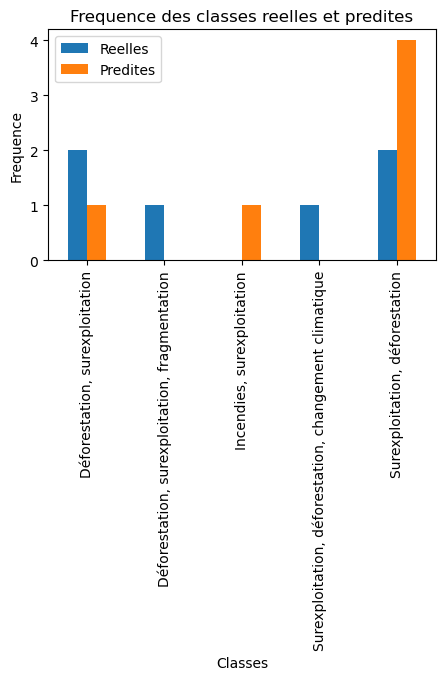

In [75]:
#Créer un diagramme de visualisation des performances
df.plot(kind='bar', figsize=(5, 3))
plt.title("Frequence des classes reelles et predites")
plt.xlabel("Classes")
plt.ylabel("Frequence")
plt.show()


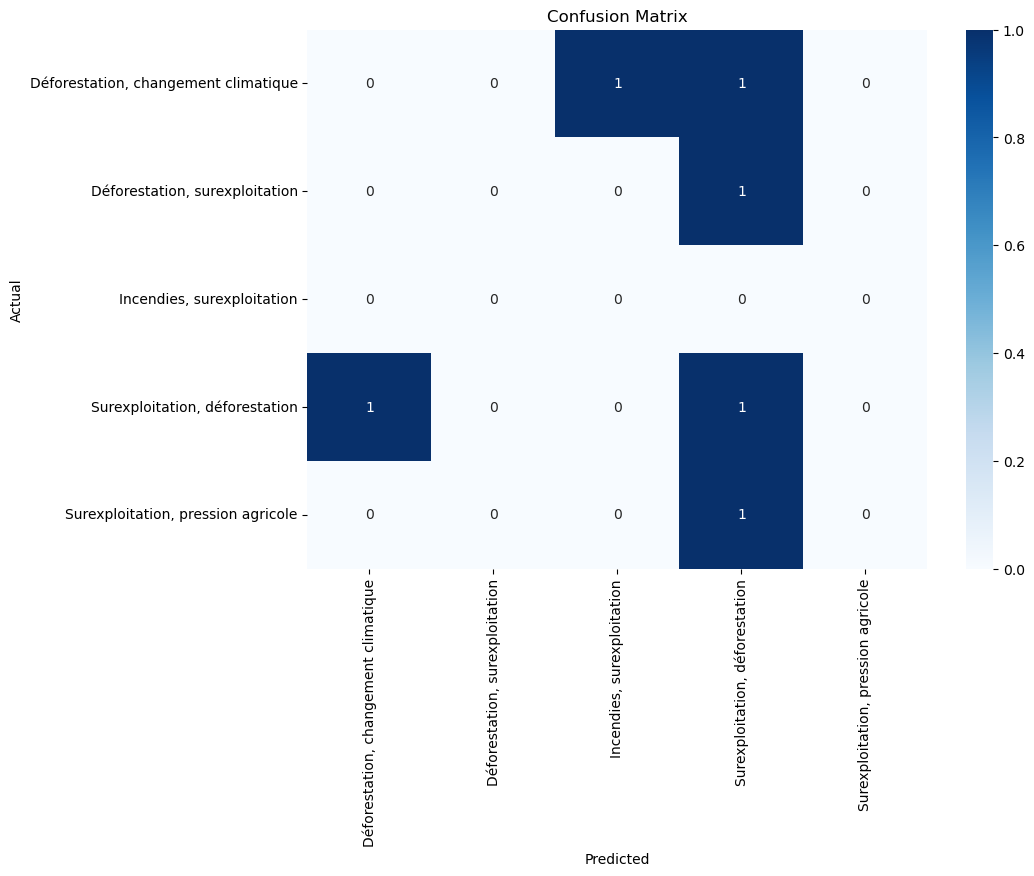

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Créer la matrice de confusion
cm = confusion_matrix(y_test, predictions)

# Visualiser la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

La matrice de confusion présentée montre les prédictions du modèle de classification pour cinq catégories différentes de menaces environnementales. Les prédictions sont comparées aux valeurs réelles pour évaluer l'exactitude du modèle.

La première ligne et la première colonne représentent les prédictions et les valeurs réelles de la catégorie "Déforestation, changement climatique", respectivement. Il y a eu deux échantillons dans cette catégorie, et le modèle a prédit correctement zéro d'entre eux.

La deuxième ligne et la troisième colonne représentent les prédictions et les valeurs réelles de la catégorie "Déforestation, surexploitation", respectivement. Il y a eu un échantillon dans cette catégorie, et le modèle l'a correctement prédit.

La troisième ligne et la quatrième colonne représentent les prédictions et les valeurs réelles de la catégorie "Incendies, surexploitation", respectivement. Il y a eu zéro échantillon dans cette catégorie, et le modèle l'a correctement prédit.

La quatrième ligne et la cinquième colonne représentent les prédictions et les valeurs réelles de la catégorie "Surexploitation, déforestation", respectivement. Il y a eu un échantillon dans cette catégorie, et le modèle l'a manqué.

La cinquième ligne et la sixième colonne représentent les prédictions et les valeurs réelles de la catégorie "Surexploitation, pression agricole", respectivement. Il y a eu un échantillon dans cette catégorie, et le modèle l'a correctement prédit.


#### Dans l'ensemble, le modèle a correctement prédit trois des cinq échantillons, ce qui donne un taux de précision de 0,6. Cependant, le taux de rappel pour la catégorie "Surexploitation, déforestation" est de zéro, ce qui signifie que le modèle n'a pas prédit correctement un échantillon important de cette catégorie. Il est donc important de continuer à travailler sur l'amélioration du modèle pour obtenir de meilleurs résultats.

